percent of women in the science 

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

df = pd.read_csv("/Users/anapocai/Desktop/CENTRALE/Nice/S8/data_analyses/DataAnalysisAndVisualization/Project/Data_analyse_project/academic_performance_dataset_V2.csv")

df.head()


,ID No,Prog Code,Gender,YoG,CGPA,CGPA100,CGPA200,CGPA300,CGPA400,SGPA
0,42308,ICE,Female,2010,3.23,2.88,3.48,2.62,2.90,3.13
1,70978,BCH,Female,2010,3.58,3.25,4.26,3.37,3.47,3.02
2,31602,BCH,Male,2010,2.21,1.78,1.98,1.49,2.51,2.19
3,63847,BCH,Male,2010,2.70,2.67,2.44,2.00,2.35,3.19
4,30158,BCH,Female,2010,3.88,3.61,3.69,3.63,4.58,4.24


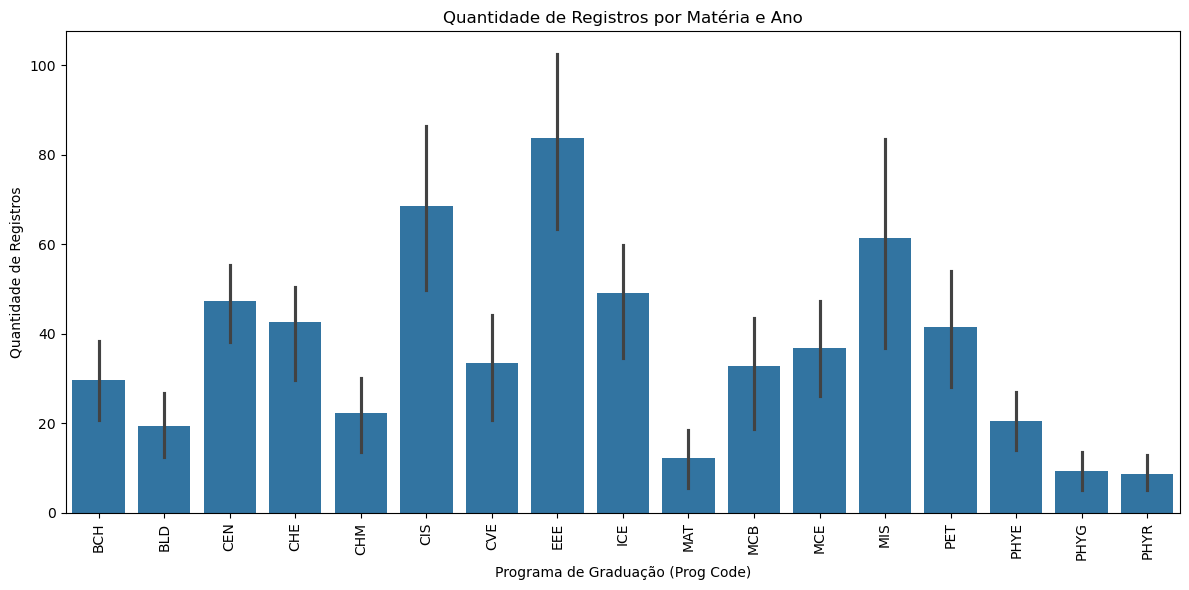

In [106]:
# Contar os dados por 'YoG' e 'Prog Code'
count_by_subject = df.groupby(['YoG', 'Prog Code']).size()

# Resetar o índice para facilitar o gráfico
count_by_subject = count_by_subject.reset_index(name='Count')

# Plotar o gráfico
plt.figure(figsize=(12, 6))
sns.barplot(x='Prog Code', y='Count', data=count_by_subject)

# Rotacionar os rótulos no eixo X para uma melhor visualização
plt.xticks(rotation=90)

# Adicionar título e labels
plt.title('Quantidade de Registros por Matéria e Ano')
plt.xlabel('Programa de Graduação (Prog Code)')
plt.ylabel('Quantidade de Registros')

# Exibir o gráfico
plt.tight_layout()
plt.show()

In [107]:
df_sorted = df.sort_values(by=['YoG', 'Prog Code'])
df_sorted

,ID No,Prog Code,Gender,YoG,CGPA,CGPA100,CGPA200,CGPA300,CGPA400,SGPA
1,70978,BCH,Female,2010,3.58,3.25,4.26,3.37,3.47,3.02
2,31602,BCH,Male,2010,2.21,1.78,1.98,1.49,2.51,2.19
3,63847,BCH,Male,2010,2.70,2.67,2.44,2.00,2.35,3.19
4,30158,BCH,Female,2010,3.88,3.61,3.69,3.63,4.58,4.24
5,51740,BCH,Male,2010,2.97,2.66,2.98,3.28,3.07,3.13
...,...,...,...,...,...,...,...,...,...,...
3004,36589,PHYR,Male,2014,3.25,2.90,3.25,3.20,3.53,1.67
3005,88479,PHYR,Male,2014,3.99,3.92,4.21,3.68,4.41,3.06
3006,30462,PHYR,Male,2014,3.28,3.27,3.37,2.97,3.50,4.51
3007,46237,PHYR,Male,2014,3.30,3.27,3.06,3.35,3.63,3.47


In [108]:
gender_counts = df.groupby(['YoG', 'Prog Code', 'Gender']).size().unstack(fill_value=0)
gender_counts

Gender          Female  Male
YoG  Prog Code              
2010 BCH            10     8
     BLD             3     5
     CEN            19    42
     CHE            21    30
     CHM             5     2
...                ...   ...
2014 MIS            24    20
     PET            19    33
     PHYE            4    14
     PHYG            1     5
     PHYR            0     8

[81 rows x 2 columns]

In [109]:
gender_counts['Female_Percentage'] = (gender_counts['Female'] / (gender_counts['Female'] + gender_counts['Male'])) * 100
gender_counts

Gender          Female  Male  Female_Percentage
YoG  Prog Code                                 
2010 BCH            10     8          55.555556
     BLD             3     5          37.500000
     CEN            19    42          31.147541
     CHE            21    30          41.176471
     CHM             5     2          71.428571
...                ...   ...                ...
2014 MIS            24    20          54.545455
     PET            19    33          36.538462
     PHYE            4    14          22.222222
     PHYG            1     5          16.666667
     PHYR            0     8           0.000000

[81 rows x 3 columns]

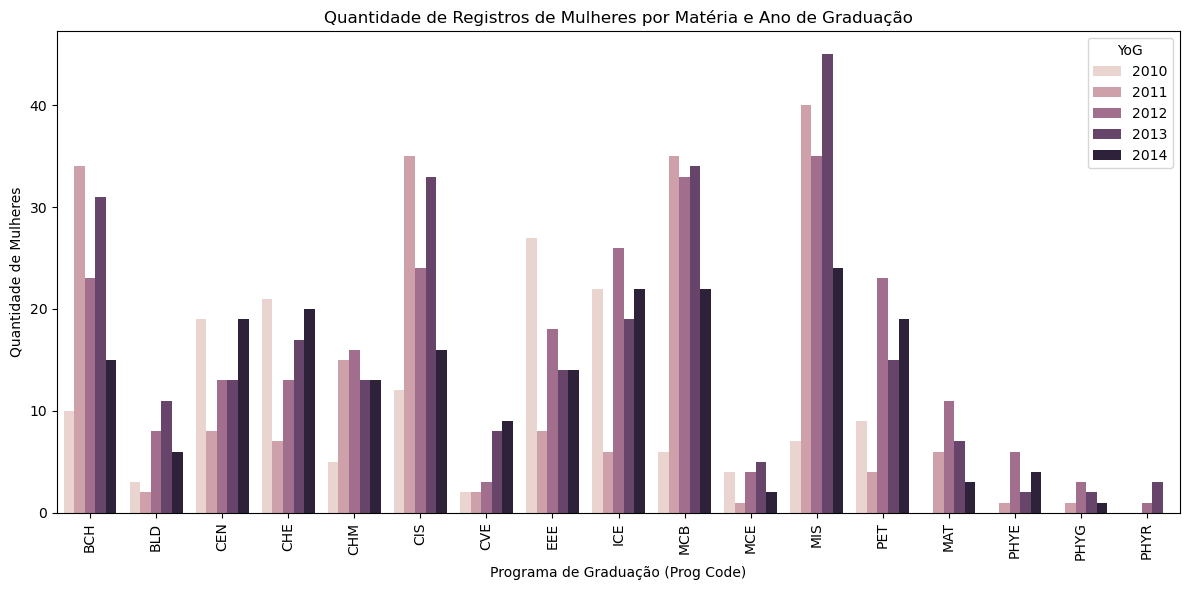

In [110]:
# Filtrar os dados para mulheres
df_female = df[df['Gender'] == 'Female']

# Contar a quantidade de registros por 'YoG', 'Prog Code' e 'Gender'
female_counts = df_female.groupby(['YoG', 'Prog Code']).size().reset_index(name='Count')

# Plotar o gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='Prog Code', y='Count', hue='YoG', data=female_counts)

# Rotacionar os rótulos no eixo X para uma melhor visualização
plt.xticks(rotation=90)

# Adicionar título e labels
plt.title('Quantidade de Registros de Mulheres por Matéria e Ano de Graduação')
plt.xlabel('Programa de Graduação (Prog Code)')
plt.ylabel('Quantidade de Mulheres')

# Exibir o gráfico
plt.tight_layout()
plt.show()



In [111]:

year_dfs = {}

for year in gender_counts.index.get_level_values('YoG').unique():
    year_data = gender_counts.loc[year]
    
    sorted_year_data = year_data.sort_values(by='Female', ascending=True)
    
    year_dfs[year] = sorted_year_data[['Female']]

# [2010, 2011, 2012, 2013, 2014]
df_2010 = year_dfs[2010]
df_2011 = year_dfs[2011]
df_2012 = year_dfs[2012]
df_2013 = year_dfs[2013]
df_2014 = year_dfs[2014]


2010

In [112]:
df_2010 = df_2010.reset_index()

df_2010

Gender,Prog Code,Female
0,MAT,0
1,CVE,2
2,BLD,3
3,MCE,4
4,CHM,5
5,MCB,6
6,MIS,7
7,PET,9
8,BCH,10
9,CIS,12


2011

In [113]:
df_2011 = df_2011.reset_index()
df_2011

Gender,Prog Code,Female
0,MCE,1
1,PHYE,1
2,PHYG,1
3,BLD,2
4,CVE,2
5,PET,4
6,ICE,6
7,MAT,6
8,CHE,7
9,CEN,8


2012

In [114]:
df_2012 = df_2012.reset_index()
df_2012

Gender,Prog Code,Female
0,PHYR,1
1,CVE,3
2,PHYG,3
3,MCE,4
4,PHYE,6
5,BLD,8
6,MAT,11
7,CEN,13
8,CHE,13
9,CHM,16


2013

In [115]:
df_2013 = df_2013.reset_index()
df_2013

Gender,Prog Code,Female
0,PHYE,2
1,PHYG,2
2,PHYR,3
3,MCE,5
4,MAT,7
5,CVE,8
6,BLD,11
7,CEN,13
8,CHM,13
9,EEE,14


2014

In [116]:
df_2014 = df_2014.reset_index()
df_2014

Gender,Prog Code,Female
0,PHYR,0
1,PHYG,1
2,MCE,2
3,MAT,3
4,PHYE,4
5,BLD,6
6,CVE,9
7,CHM,13
8,EEE,14
9,BCH,15



biology = BCH, MCB
computer science = CEN , CIS , MIS, PHYE
enginering = CHE , CHM , CVE, EEE , ICE , MCE, PET 
tech = BLD, MIS
math et phy = MAT, PHYG, PHYR

In [117]:


# Definindo os tópicos e suas respectivas matérias
topics = {
    'biology': ['BCH', 'MCB'],
    'computer_science': ['CEN', 'CIS', 'MIS', 'PHYE'],
    'engineering': ['CHE', 'CHM', 'CVE', 'EEE', 'ICE', 'MCE', 'PET'],
    'tech': ['BLD', 'MIS'],
    'math_and_phy': ['MAT', 'PHYG', 'PHYR']
}

# Criar um novo DataFrame para armazenar as porcentagens de mulheres por tópico
topic_percentages = {}

# Iterar sobre os tópicos e calcular a porcentagem de mulheres para cada grupo
for topic, subjects in topics.items():
    # Filtra as matérias que pertencem ao tópico
    filtered_data = gender_counts[gender_counts.index.get_level_values('Prog Code').isin(subjects)]
    
    # Calcular a porcentagem de mulheres por ano para esse grupo de matérias
    female_percentage_by_year = filtered_data.groupby('YoG')['Female_Percentage'].mean()
    
    # Adicionar o resultado ao dicionário
    topic_percentages[topic] = female_percentage_by_year

# Criar um DataFrame com as porcentagens para cada tópico
topic_percentage_df = pd.DataFrame(topic_percentages)

# Exibir o DataFrame final
topic_percentage_df


,biology,computer_science,engineering,tech,math_and_phy
YoG,,,,,
2010,65.277778,31.351506,32.690440,36.250000,0.000000
2011,81.201550,33.275937,26.585668,34.090909,33.928571
2012,77.619048,32.840251,29.731397,45.358187,31.269841
2013,77.745995,28.515406,25.667664,41.912775,25.101215
2014,81.781377,37.581449,34.939435,38.383838,25.555556


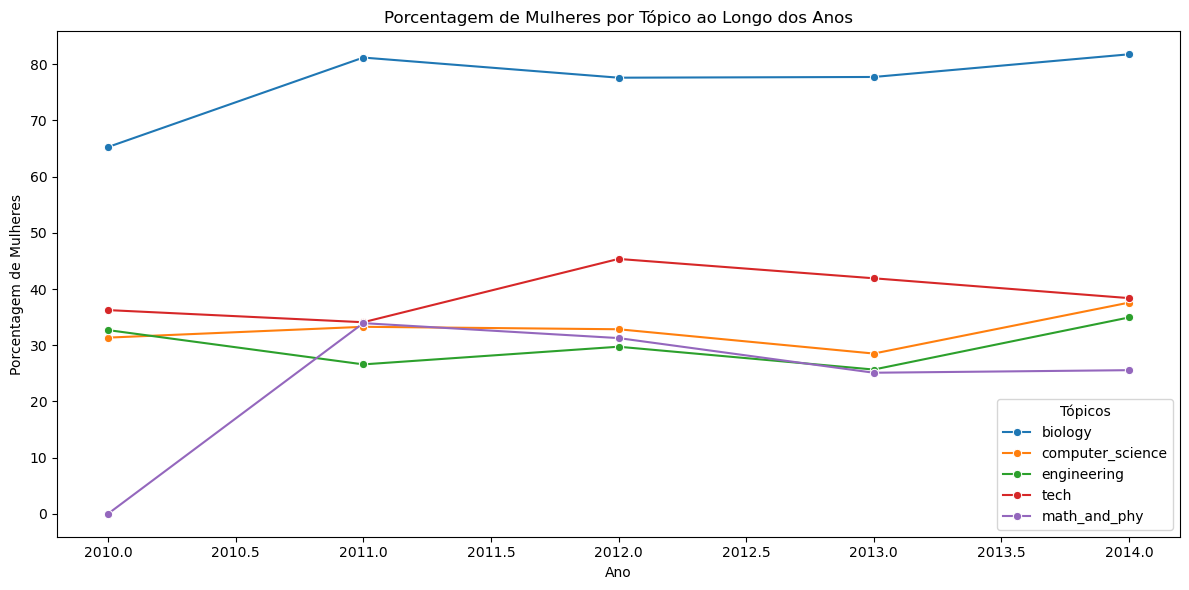

In [118]:

# Convertendo o DataFrame para um formato 'long' para facilitar o plot
topic_percentage_df = topic_percentage_df.reset_index()
topic_percentage_df = topic_percentage_df.melt(id_vars='YoG', 
                                                value_vars=topics.keys(), 
                                                var_name='Topic', 
                                                value_name='Female_Percentage')

# Criando o gráfico
plt.figure(figsize=(12, 6))
sns.lineplot(x='YoG', y='Female_Percentage', hue='Topic', data=topic_percentage_df, marker='o')

# Adicionando título e rótulos
plt.title('Porcentagem de Mulheres por Tópico ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Porcentagem de Mulheres')

# Exibindo a legenda
plt.legend(title='Tópicos')

# Exibindo o gráfico
plt.tight_layout()
plt.show()


Biology: BCH, MCB

Math : MAT

Chemistry: CHE, CHM, PET

Physics: PHYE, PHYG, PHYR

Mecanics: CVE, MCE, BLD

Electronics and elctrical: EEE

Information and computer: CEN, CIS, ICE, MIS

In [119]:
# Definindo os tópicos e suas respectivas matérias
topics = {
    'biology': ['BCH', 'MCB'],
    'computer_science': ['CEN', 'CIS', 'ICE'],
    'tech': ['BLD', 'MIS'],
    'math': ['MAT'],
    'physics': ['PHYG', 'PHYR', 'PHYE'],
    'Chemistry' : ['CHE','CHM' ,'PET'],
    'Mecanics' : ['CVE', 'MCE', 'BLD']
}

# Criar um novo DataFrame para armazenar as porcentagens de mulheres por tópico
topic_percentages = {}

# Iterar sobre os tópicos e calcular a porcentagem de mulheres para cada grupo
for topic, subjects in topics.items():
    # Filtra as matérias que pertencem ao tópico
    filtered_data = gender_counts[gender_counts.index.get_level_values('Prog Code').isin(subjects)]
    
    # Calcular a porcentagem de mulheres por ano para esse grupo de matérias
    female_percentage_by_year = filtered_data.groupby('YoG')['Female_Percentage'].mean()
    
    # Adicionar o resultado ao dicionário
    topic_percentages[topic] = female_percentage_by_year

# Criar um DataFrame com as porcentagens para cada tópico
topic_percentage_df = pd.DataFrame(topic_percentages)

# Exibir o DataFrame final
topic_percentage_df

,biology,computer_science,tech,math,physics,Chemistry,Mecanics
YoG,,,,,,,
2010,65.277778,31.325051,36.250000,0.000000,NaN,48.646125,20.526756
2011,81.201550,33.891726,34.090909,42.857143,17.500000,39.973803,13.040663
2012,77.619048,37.773774,45.358187,52.380952,20.952381,40.315067,19.376968
2013,77.745995,29.528478,41.912775,36.842105,15.384615,35.218012,20.020425
2014,81.781377,38.898458,38.383838,60.000000,12.962963,52.334716,16.311782


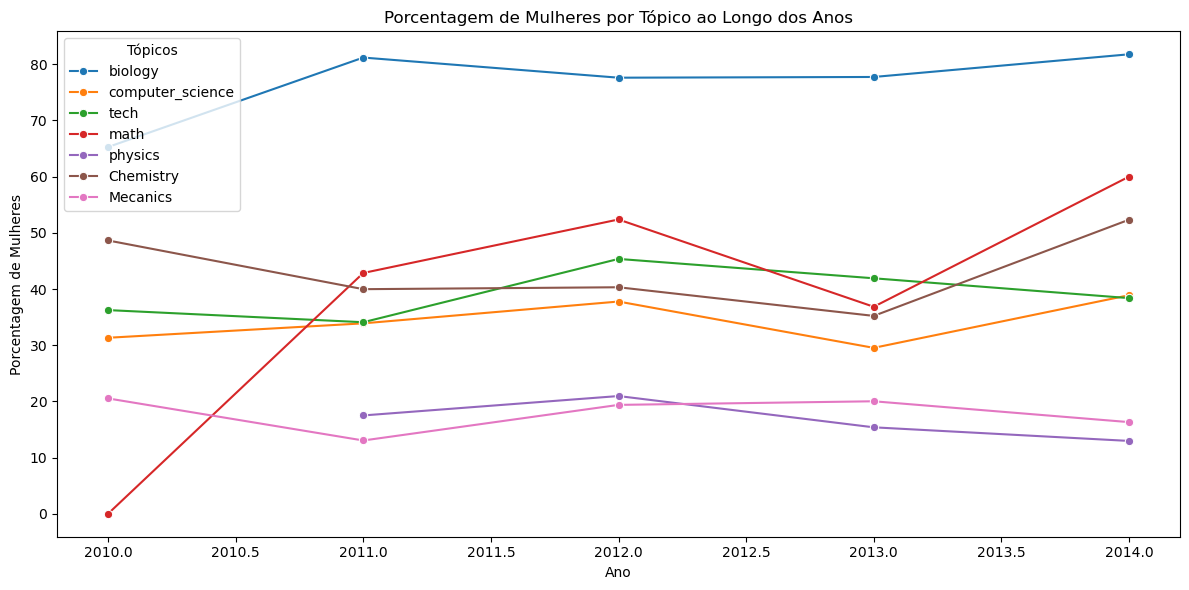

In [120]:

# Convertendo o DataFrame para um formato 'long' para facilitar o plot
topic_percentage_df = topic_percentage_df.reset_index()
topic_percentage_df = topic_percentage_df.melt(id_vars='YoG', 
                                                value_vars=topics.keys(), 
                                                var_name='Topic', 
                                                value_name='Female_Percentage')

# Criando o gráfico
plt.figure(figsize=(12, 6))
sns.lineplot(x='YoG', y='Female_Percentage', hue='Topic', data=topic_percentage_df, marker='o')

# Adicionando título e rótulos
plt.title('Porcentagem de Mulheres por Tópico ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Porcentagem de Mulheres')

# Exibindo a legenda
plt.legend(title='Tópicos')

# Exibindo o gráfico
plt.tight_layout()
plt.show()

In [121]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Criar o subplot 2x3
fig = make_subplots(
    rows=2, cols=3,  # 2 linhas e 3 colunas
    subplot_titles=['2010', '2011', '2012', '2013', '2014'],  # Títulos dos gráficos de cada ano
    specs=[[{'type': 'treemap'}, {'type': 'treemap'}, {'type': 'treemap'}],
           [{'type': 'treemap'}, {'type': 'treemap'}, {'type': 'indicator'}]]  # O sexto será para a legenda
)


years = [2010, 2011, 2012, 2013, 2014]



# Dicionário de tópicos e cursos
topics = {
    'Biology': ['BCH', 'MCB'],
    'Computer Science': ['CEN', 'CIS', 'ICE'],
    'Tech': ['BLD', 'MIS'],
    'Math': ['MAT'],
    'Physics': ['PHYG', 'PHYR', 'PHYE'],
    'Chemistry': ['CHE', 'CHM', 'PET'],
    'Mechanics': ['CVE', 'MCE', 'BLD']
}

def map_topic(course):
    for topic, courses in topics.items():
        if course in courses:
            return topic


df_years = [df_2010, df_2011, df_2012, df_2013, df_2014]
for i in range(len(df_years)):
    df_years[i]['topic'] = df_years[i]['Prog Code'].apply(map_topic)
    df_grouped = df_years[i].groupby('topic', as_index=False)['Female'].sum()
    fig.add_trace(
        go.Treemap(
            labels=df_grouped['topic'],
            parents=[''] * len(df_grouped),
            values=df_grouped['Female'],
            textinfo="label+value+percent entry",
            hoverinfo="label+value+percent entry"
        ),
        row=(i // 3) + 1,  # Calcula a linha
        col=(i % 3) + 1  # Calcula a coluna
    )
    


# Adicionar a legenda como um gráfico separado na última posição


# Atualizar o layout para o subplot
fig.update_layout(
    title="Treemaps of Woman by Topic (years 2010-2014)",
    height=700, width=900,
    showlegend=False
)

# Mostrar a figura
fig.show()

In [122]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Criar o subplot 2x3
fig = make_subplots(
    rows=2, cols=3,  # 2 linhas e 3 colunas
    subplot_titles=['2010', '2011', '2012', '2013', '2014'],  # Títulos dos gráficos de cada ano
    specs=[[{'type': 'treemap'}, {'type': 'treemap'}, {'type': 'treemap'}],
           [{'type': 'treemap'}, {'type': 'treemap'}, {'type': 'indicator'}]]  # O sexto será para a legenda
)


years = [2010, 2011, 2012, 2013, 2014]



# Dicionário de tópicos e cursos
topics = {
    'Biology': ['BCH', 'MCB'],
    'Computer Science': ['CEN', 'CIS', 'ICE'],
    'Tech': ['BLD', 'MIS'],
    'Math': ['MAT'],
    'Physics': ['PHYG', 'PHYR', 'PHYE'],
    'Chemistry': ['CHE', 'CHM', 'PET'],
    'Mechanics': ['CVE', 'MCE', 'BLD']
}

def map_topic(course):
    for topic, courses in topics.items():
        if course in courses:
            return topic


df_years = [df_2010, df_2011, df_2012, df_2013, df_2014]
for i in range(len(df_years)):
    df_years[i]['topic'] = df_years[i]['Prog Code'].apply(map_topic)
    df_grouped = df_years[i].groupby('topic', as_index=False)['Female'].sum()
    fig.add_trace(
        go.Treemap(
            labels=df_grouped['topic'],
            parents=[''] * len(df_grouped),
            values=df_grouped['Female'],
            textinfo="label+value+percent entry",
            hoverinfo="label+value+percent entry"
        ),
        row=(i // 3) + 1,  # Calcula a linha
        col=(i % 3) + 1  # Calcula a coluna
    )
    


# Adicionar a legenda como um gráfico separado na última posição


# Atualizar o layout para o subplot
fig.update_layout(
    title="Treemaps of Woman by Topic (years 2010-2014)",
    height=700, width=900,
    showlegend=False
)

# Mostrar a figura
fig.show()

In [123]:
year_dfs = {}

for year in gender_counts.index.get_level_values('YoG').unique():
    year_data = gender_counts.loc[year]
    
    sorted_year_data = year_data.sort_values(by='Female_Percentage', ascending=True)
    
    year_dfs[year] = sorted_year_data[['Female_Percentage']]

# [2010, 2011, 2012, 2013, 2014]
df_2010_p = year_dfs[2010].reset_index()
df_2011_p = year_dfs[2011].reset_index()
df_2012_p = year_dfs[2012].reset_index()
df_2013_p = year_dfs[2013].reset_index()
df_2014_p = year_dfs[2014].reset_index()


In [124]:


# Criar o subplot 2x3
fig = make_subplots(
    rows=2, cols=3,  # 2 linhas e 3 colunas
    subplot_titles=['2010', '2011', '2012', '2013', '2014'],  # Títulos dos gráficos de cada ano
    specs=[[{'type': 'treemap'}, {'type': 'treemap'}, {'type': 'treemap'}],
           [{'type': 'treemap'}, {'type': 'treemap'}, {'type': 'indicator'}]]  # O sexto será para a legenda
)


years = [2010, 2011, 2012, 2013, 2014]



# Dicionário de tópicos e cursos
topics = {
    'Biology': ['BCH', 'MCB'],
    'Computer Science': ['CEN', 'CIS', 'ICE'],
    'Tech': ['BLD', 'MIS'],
    'Math': ['MAT'],
    'Physics': ['PHYG', 'PHYR', 'PHYE'],
    'Chemistry': ['CHE', 'CHM', 'PET'],
    'Mechanics': ['CVE', 'MCE', 'BLD']
}

def map_topic(course):
    for topic, courses in topics.items():
        if course in courses:
            return topic


df_years = [df_2010_p, df_2011_p, df_2012_p, df_2013_p, df_2014_p]
for i in range(len(df_years)):
    df_years[i]['topic'] = df_years[i]['Prog Code'].apply(map_topic)
    df_grouped = df_years[i].groupby('topic', as_index=False)['Female_Percentage'].sum()
    fig.add_trace(
        go.Treemap(
            labels=df_grouped['topic'],
            parents=[''] * len(df_grouped),
            values=df_grouped['Female_Percentage'],
            textinfo="label+value+percent entry",
            hoverinfo="label+value+percent entry"
        ),
        row=(i // 3) + 1,  # Calcula a linha
        col=(i % 3) + 1  # Calcula a coluna
    )
    


# Adicionar a legenda como um gráfico separado na última posição


# Atualizar o layout para o subplot
fig.update_layout(
    title="Treemaps of Percentage of  Woman by Topic (years 2010-2014)",
    height=700, width=900,
    showlegend=False
)

# Mostrar a figura
fig.show()

In [128]:


# Aplicar a função para criar a coluna de tópicos
df_2010_p['topic'] = df_2010_p['Prog Code'].apply(map_topic)  

# Agrupar os dados por tópico e somar o número de mulheres
df_grouped_2010 = df_2010_p.groupby('topic', as_index=False)['Female_Percentage'].sum()

# Criar o Treemap
fig = px.treemap(df_grouped_2010, path=['topic'], values='Female_Percentage', title="Percentage of Women by Topic in 2010")

# Mostrar o gráfico
fig.show()


In [ ]:
# Aplicar a função para criar a coluna de tópicos
df_2011_p['topic'] = df_2011_p['Prog Code'].apply(map_topic)  

# Agrupar os dados por tópico e somar o número de mulheres
df_grouped_2011 = df_2011_p.groupby('topic', as_index=False)['Female_Percentage'].sum()

# Criar o Treemap
fig = px.treemap(df_grouped_2011, path=['topic'], values='Female_Percentage', title="Percentage of Women by Topic in 2011")

# Mostrar o gráfico
fig.show()


In [130]:
# Aplicar a função para criar a coluna de tópicos
df_2012_p['topic'] = df_2012_p['Prog Code'].apply(map_topic)  

# Agrupar os dados por tópico e somar o número de mulheres
df_grouped_2012 = df_2012_p.groupby('topic', as_index=False)['Female_Percentage'].sum()

# Criar o Treemap
fig = px.treemap(df_grouped_2012, path=['topic'], values='Female_Percentage', title="Percentage of Women by Topic in 2012")

# Mostrar o gráfico
fig.show()

In [131]:
# Aplicar a função para criar a coluna de tópicos
df_2013_p['topic'] = df_2013_p['Prog Code'].apply(map_topic)  

# Agrupar os dados por tópico e somar o número de mulheres
df_grouped_2013 = df_2013_p.groupby('topic', as_index=False)['Female_Percentage'].sum()

# Criar o Treemap
fig = px.treemap(df_grouped_2013, path=['topic'], values='Female_Percentage', title="Percentage of Women by Topic in 2013")

# Mostrar o gráfico
fig.show()

In [132]:
# Aplicar a função para criar a coluna de tópicos
df_2014_p['topic'] = df_2014_p['Prog Code'].apply(map_topic)  

# Agrupar os dados por tópico e somar o número de mulheres
df_grouped_2014 = df_2014_p.groupby('topic', as_index=False)['Female_Percentage'].sum()

# Criar o Treemap
fig = px.treemap(df_grouped_2014, path=['topic'], values='Female_Percentage', title="Percentage of Women by Topic in 2014")

# Mostrar o gráfico
fig.show()